# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [294]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
merged.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [295]:
# Checking the number of mice.
numberofmice = merged["Mouse ID"].nunique()
numberofmice

249

In [296]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


In [297]:
duplicated = merged[merged.duplicated()]
duplicated

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [298]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicatedf = merged.loc[merged["Mouse ID"] == "g989"]
duplicatedf

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [299]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned = merged.loc[merged["Mouse ID"] != "g989"]
cleaned.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [300]:
# Checking the number of mice in the clean DataFrame.
cleaned["Mouse ID"].nunique()

248

## Summary Statistics

In [301]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
#for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
grouped = cleaned.groupby(["Drug Regimen"])
tumor_mean = grouped["Tumor Volume (mm3)"].mean()
tumor_median = grouped["Tumor Volume (mm3)"].median()
tumor_variance = grouped["Tumor Volume (mm3)"].var()
tumor_stdev = grouped["Tumor Volume (mm3)"].std()
tumor_sem = grouped["Tumor Volume (mm3)"].sem()

regimen_summary = pd.DataFrame({"Mean Tumor Volume" : tumor_mean,
                               "Median Tumor Volume" : tumor_median,
                               "Tumor Volume Variance" : tumor_variance,
                               "Tumor Volume Std. Dev." : tumor_stdev,
                               "Tumor Volume Std. Err." : tumor_sem})

#Display the regimen summary
regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [302]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
#using the grouped DF
aggregate = grouped.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
aggregate

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# Of Observed Mouse Timepoints'>

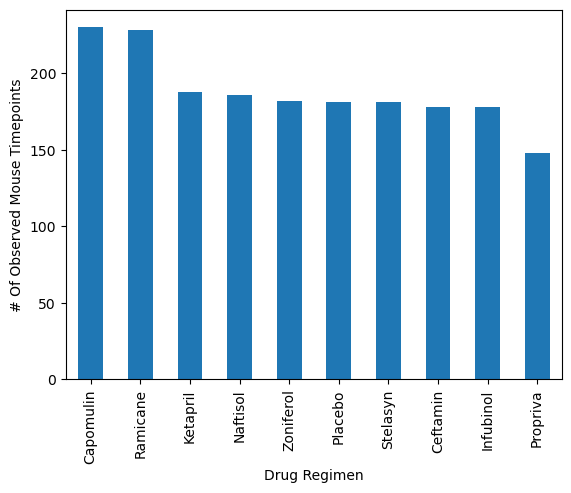

In [303]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#x-axis is drug regimen, y-axis is mouse time points

#create a new dataframe to plot
groupedbarchart = cleaned.groupby(["Drug Regimen"])
mice = groupedbarchart["Mouse ID"].count()
drug  = groupedbarchart["Drug Regimen"]
groupedsummary = pd.DataFrame({"Mouse Count" : mice}).sort_values(by="Mouse Count", ascending=False)

#script barchart based on above dataframe using pd.plot
groupedsummary.plot(kind="bar", y="Mouse Count", legend=False, xlabel="Drug Regimen", 
                    ylabel="# Of Observed Mouse Timepoints")


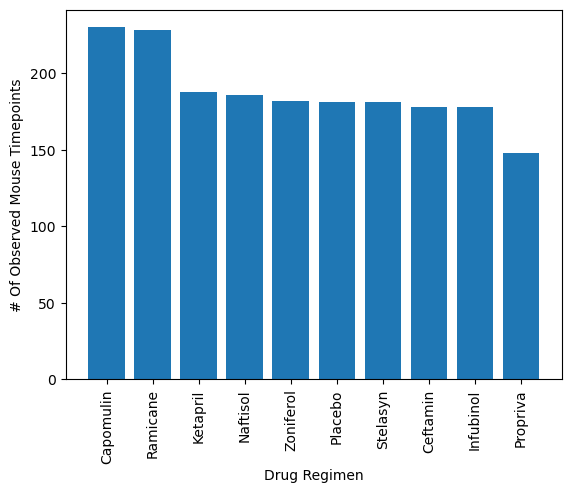

In [304]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#create a new dataframe to plot
groupedbarchart = cleaned.groupby(["Drug Regimen"])
mice = groupedbarchart["Mouse ID"].count()
groupedsummary = pd.DataFrame({"Mouse Count" : mice}).sort_values(by="Mouse Count", ascending=False)

#script barchart based on above dataframe
x = np.arange(len(groupedsummary))
plt.bar(x, groupedsummary["Mouse Count"])
plt.xticks(x, groupedsummary.index, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# Of Observed Mouse Timepoints")
plt.show()

<Axes: ylabel='Sex'>

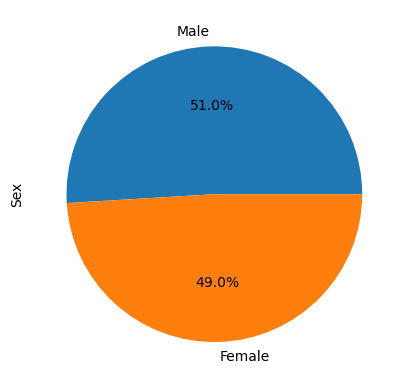

In [305]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#calculate the distribution of male/female mice 

genderdf = cleaned["Sex"].value_counts()/(len(cleaned))*100
genderdf.plot(kind="pie", autopct="%2.1f%%")

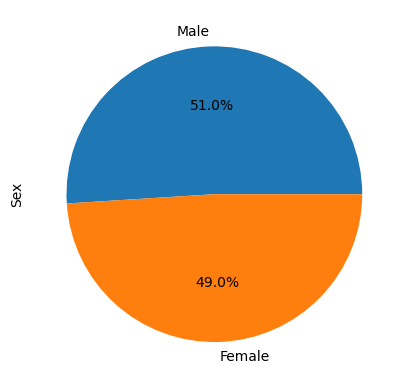

In [306]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#calculate the distribution of male/female mice 
male = round((cleaned["Sex"].value_counts()["Male"]/len(cleaned))*100, 1)
female = round((cleaned["Sex"].value_counts()["Female"]/len(cleaned))*100, 1)

#create labels and values
labels = ["Male", "Female"]
values = [male, female]

#plot the pie graph
plt.pie(values, labels=labels, autopct="%2.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [307]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

fourregimen = cleaned.copy().set_index("Drug Regimen")
fourregimen = fourregimen.loc[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]]
fourregimen = fourregimen.groupby(["Mouse ID"])
# Start by getting the last (greatest) timepoint for each mouse
greatesttime = fourregimen["Timepoint"].max()
#create a new df to merge greatest timepoint for each mouse
tomerge = cleaned.copy()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
lasttumordf = pd.merge(greatesttime, tomerge, on=["Mouse ID", "Timepoint"])
lasttumordf.head(1)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23


In [308]:
lasttumordf.dtypes

Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
dtype: object

In [383]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Ramicane", "Capomulin", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    finaltumorvolume = lasttumordf.loc[lasttumordf["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    volumes.append(finaltumorvolume)
    #calculate the statistics per drug regimen that we are looping through
    quartiles = finaltumorvolume.quantile([.25,.5,.75])
    lowerq = round(quartiles[0.25],6)
    upperq = round(quartiles[0.75], 6)
    iqr = round(upperq-lowerq, 6)

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    outlierrows = lasttumordf["Tumor Volume (mm3)"]
    
    # Determine outliers using upper and lower bounds
    outliers= outlierrows.loc[(lasttumordf['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (lasttumordf['Tumor Volume (mm3)'] <= lower_bound)]
    outliers_count = outliers.count()
    
    print(f"{drug} potential outliers: {outliers_count}. {outliers} Upper bound is {upper_bound}, lower bound is {lower_bound}")
    #print(f"{drug} upper bound is {upper_bound} and lower bound is {lower_bound} and has {outliers_count} outliers")
    

Ramicane potential outliers: 35. 0     67.973419
1     65.525743
2     62.999356
6     57.031862
8     66.083066
11    56.057749
13    55.742829
14    72.226731
18    60.969711
20    62.435404
22    60.918767
31    67.289621
36    61.849023
39    68.923185
41    66.196912
42    62.117279
43    67.748662
44    57.918381
47    59.851956
48    64.299830
55    60.165180
56    59.741901
57    55.629428
59    61.433892
60    54.656549
61    64.192341
69    55.650681
84    67.527482
86    58.268442
91    64.634949
92    61.386660
93    67.685569
95    68.594745
97    64.729837
99    62.754451
Name: Tumor Volume (mm3), dtype: float64 Upper bound is 54.30681, lower bound is 17.912666
Capomulin potential outliers: 37. 0     67.973419
1     65.525743
2     62.999356
6     57.031862
8     66.083066
11    56.057749
13    55.742829
14    72.226731
18    60.969711
20    62.435404
22    60.918767
31    67.289621
36    61.849023
39    68.923185
41    66.196912
42    62.117279
43    67.748662
44    57.9

In [ ]:
#     micenvol = cleaned.copy().set_index("Drug Regimen")
#     micenvol = micenvol.loc[["Ramicane", "Capomulin", "Infubinol", "Ceftamin"]]
#     micenvol = micenvol[["Mouse ID", "Tumor Volume (mm3)"]]
#     # add subset 
#     outlier = micenvol[(micenvol["Tumor Volume (mm3)"] > upper_bound) | (micenvol["Tumor Volume (mm3)"] < lower_bound)]
#     outliercount = outlier.count()
    #print(f"{drug} has {outliercount} outliers.")

In [310]:

#Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
#Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
#Infubinol's potential outliers: 31    36.321346
#Name: Tumor Volume (mm3), dtype: float64
#Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

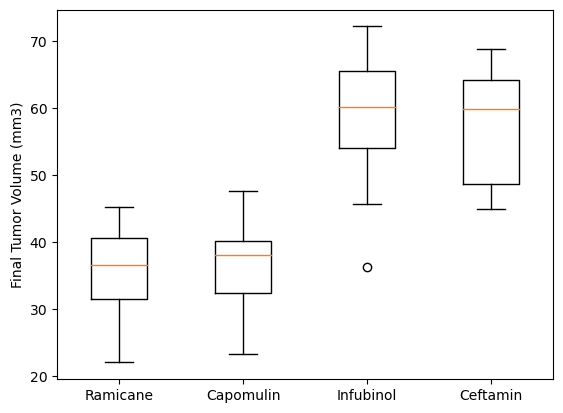

In [311]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(volumes)
ax1.set_xticklabels(treatments)
plt.show()

## Line and Scatter Plots

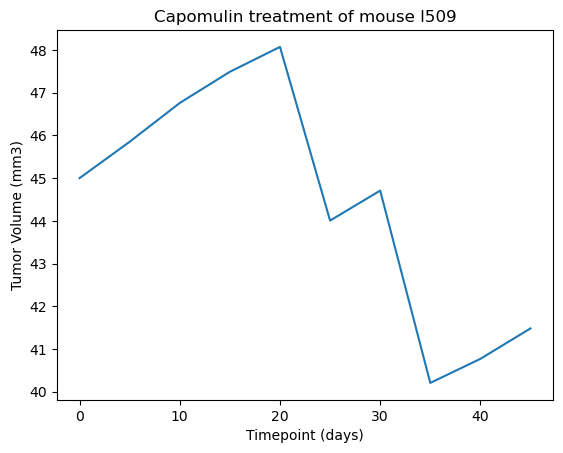

In [312]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mousel509 = pd.DataFrame(cleaned.loc[cleaned["Mouse ID"]=="l509",:])
mousel509
x = mousel509["Timepoint"]
y = mousel509["Tumor Volume (mm3)"]
plt.plot(x, y)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [313]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#calculate average tumor volume for Capomulin
weightvol = cleaned[cleaned["Drug Regimen"] == "Capomulin"]
grouped = weightvol.groupby(["Mouse ID"]).mean()


/var/folders/3d/nswm3y911r381v5qkgygq1xw0000gn/T/ipykernel_19752/3539528854.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = weightvol.groupby(["Mouse ID"]).mean()


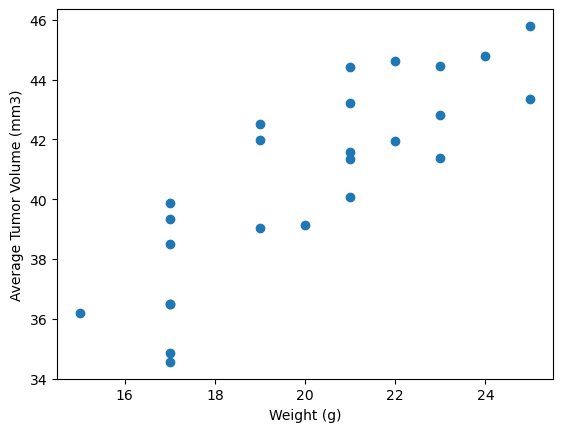

In [314]:
plt.scatter(x=grouped["Weight (g)"], y=grouped["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


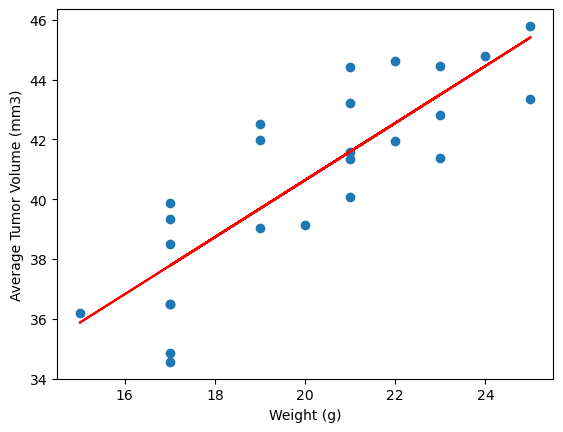

In [315]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
#coeff = round(st.pearsonr(grouped["Weight (g)"],grouped["Tumor Volume (mm3)"]),2)
coeff = round(st.pearsonr(grouped["Weight (g)"],grouped["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {coeff}")

#Perform linear regression
wv_slope, wv_int, wv_r, wv_p, wv_stderr = st.linregress(grouped["Weight (g)"],grouped["Tumor Volume (mm3)"])
#Create the equation for line of regression
regline = wv_slope * grouped["Weight (g)"] + wv_int

#Draw the scatter plot
plt.scatter(x=grouped["Weight (g)"], y=grouped["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
#Draw the regression line
plt.plot(grouped["Weight (g)"], regline, color="r")
plt.show()